In [101]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install cellpylib


In [180]:
from tensorflow import keras
from keras.models import Sequential
import cellpylib as cpl
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, MaxPooling1D
from keras.utils import np_utils
import random
from sklearn.model_selection import train_test_split
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 180
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

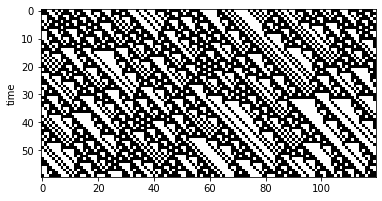

In [69]:
cellular_automaton = cpl.init_random(120)

# Mitchell et al. discovered this rule using a Genetic Algorithm
rule_number = 30

# evolve the CA, setting r to 3, for a neighbourhood size of 7
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=60,
                                apply_rule=lambda n, c, t: cpl.binary_rule(n, rule_number), r=1, memoize=False)

cpl.plot(cellular_automaton)

In [54]:
ca_classes = [1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 
2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 3, 
2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 
2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 
2, 2, 2, 2, 1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 4, 2, 2, 2, 2, 
2, 2, 2, 2, 2, 3, 3, 3, 2, 4, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 3, 1, 4, 
2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 
3, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 
2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 
2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 
1, 1, 1]
"""
create 128 random samples for every rule, 
"""

CA_data = []

for i in range(len(ca_classes)):
    for j in range(128):
        rule_number = i
        cellular_automaton = cpl.init_random(120)
        # evolve the CA, setting r to 3, for a neighbourhood size of 7
        cellular_automaton = cpl.evolve(cellular_automaton, timesteps=60, apply_rule=lambda n, c, t: cpl.binary_rule(n, rule=rule_number), r=1)
        CA_data.append((cellular_automaton,ca_classes[i]))
        



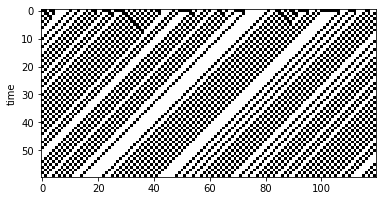

32768

In [70]:
cpl.plot(CA_data[9000][0])
len(CA_data)

In [72]:
#save the data into a .txt file
with open('ECA.txt', 'w') as filehandle:
    for listitem in CA_data:
        filehandle.write(f'{listitem}\n')

In [160]:

random.shuffle(CA_data)
X_data = np.array([x for (x,y) in CA_data])
Y_data = np.array([y for (x,y) in CA_data])
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.8)


In [152]:
y_train

array([2, 3, 1, ..., 2, 2, 2])

In [166]:
#Reshape input data to have 3D images
depth = 1
img_shape = (60, 120, depth)

X_train = X_train.reshape(X_train.shape[0], *img_shape)
X_test = X_test.reshape(X_test.shape[0], *img_shape)

# Convert 1-dimensional class arrays to 4-dimensional class matrices
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
Y_train = np.array([[b,c,d,e] for [a,b,c,d,e] in Y_train])
Y_test = np.array([[b,c,d,e] for [a,b,c,d,e] in Y_test])
Y_train.shape


(6553, 4)

In [167]:
#model
img_shape = (60,120,1)
ca_model = Sequential()
ca_model.add(Conv2D(16,kernel_size=(2,3), input_shape = img_shape))
ca_model.add(Activation('relu'))
ca_model.add(Conv2D(16,kernel_size=(2,3)))
ca_model.add(Activation('relu'))
ca_model.add(MaxPooling2D(pool_size=(57,114)))
ca_model.add(Flatten())
ca_model.add(Dense(256))
ca_model.add(Dense(4))
ca_model.add(Activation('softmax'))
ca_model.summary()



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 59, 118, 16)       112       
_________________________________________________________________
activation_44 (Activation)   (None, 59, 118, 16)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 58, 116, 16)       1552      
_________________________________________________________________
activation_45 (Activation)   (None, 58, 116, 16)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)             

In [168]:
ca_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [170]:
# Train
batch_size = 128
epochs = 400

n_data_train = int(0.3 * X_train.shape[0])
n_data_test = int(0.3 * X_test.shape[0])

start_time = time.process_time()
        
training = ca_model.fit(X_train[0:n_data_train], Y_train[0:n_data_train], 
                         batch_size=batch_size, 
                         epochs=epochs, 
                         validation_data=(X_test[0:n_data_test], 
                                          Y_test[0:n_data_test]),
                         verbose=2)
                         #callbacks=[checkpointer, early_stopping], 
    
print('\n\nTraining time: {:.3f} sec\n'.format(time.process_time() - start_time))

score = ca_model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/400
16/16 - 8s - loss: 0.7993 - accuracy: 0.7491 - val_loss: 0.7676 - val_accuracy: 0.7572
Epoch 2/400
16/16 - 8s - loss: 0.7886 - accuracy: 0.7491 - val_loss: 0.7536 - val_accuracy: 0.7572
Epoch 3/400
16/16 - 7s - loss: 0.7708 - accuracy: 0.7491 - val_loss: 0.7386 - val_accuracy: 0.7572
Epoch 4/400
16/16 - 8s - loss: 0.7534 - accuracy: 0.7491 - val_loss: 0.7215 - val_accuracy: 0.7572
Epoch 5/400
16/16 - 8s - loss: 0.7323 - accuracy: 0.7491 - val_loss: 0.7003 - val_accuracy: 0.7572
Epoch 6/400
16/16 - 8s - loss: 0.7065 - accuracy: 0.7491 - val_loss: 0.6773 - val_accuracy: 0.7572
Epoch 7/400
16/16 - 8s - loss: 0.6822 - accuracy: 0.7491 - val_loss: 0.6531 - val_accuracy: 0.7572
Epoch 8/400
16/16 - 8s - loss: 0.6572 - accuracy: 0.7496 - val_loss: 0.6315 - val_accuracy: 0.7620
Epoch 9/400
16/16 - 9s - loss: 0.6320 - accuracy: 0.7628 - val_loss: 0.6101 - val_accuracy: 0.7832
Epoch 10/400
16/16 - 9s - loss: 0.6063 - accuracy: 0.7710 - val_loss: 0.5832 - val_accuracy: 0.7885
Epoch 11/

In [181]:
#save the model to device

# serialize model to JSON
model_json = ca_model.to_json()
with open("ca_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
ca_model.save_weights("ca_model.h5")
print("Saved model to disk")

Saved model to disk


<AxesSubplot:>

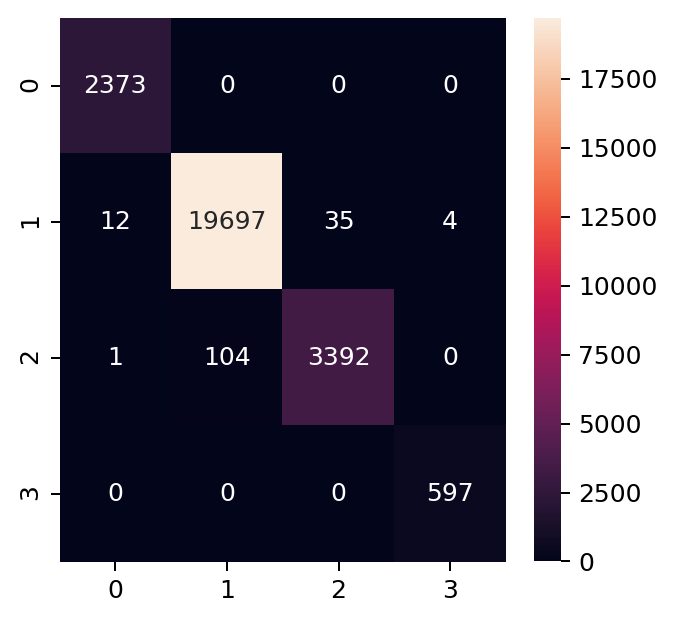

In [179]:
#note: add one to classs numbers

Y_prediction = ca_model.predict(X_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction, axis = 1)

# Convert test data to one hot vectors
Y_true = np.argmax(Y_test, axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(4,4))
sns.heatmap(confusion_mtx, annot=True, fmt="d")

# EXPERIMENTS